# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.001
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.003
-0.003
-0.003
-0.003
0.0
-0.003
-0.004
-0.003
0.982
0.984
0.986
0.985
0.986
1.965
1.967
1.969
1.968
1.968
2.951
2.951
2.95
2.951
3.934
3.934
3.933
3.933
4.917
4.917
4.916
4.916
5.9
5.902
5.905
5.904
5.904
6.791
6.794
6.796
6.795
6.795
7.685
7.688
7.689
7.688
7.688
8.673
8.675
8.677
8.676
8.675
9.659
9.661
9.663
9.663
9.662
10.643
10.644
10.647
10.646
10.645
11.627
11.628
11.631
11.63
11.63
12.613
12.616
12.619
12.617
12.617
13.603
13.605
13.607
13.607
13.606
14.502
14.504
14.506
14.505
14.505
15.405
15.407
15.409
15.409
15.409
16.396
16.396
16.395
16.395
17.381
17.381
17.38
17.38
18.366
18.366
18.364
18.365
19.349
19.349
19.348
19.348
20.335
20.335
20.334
20.334
21.324
21.323
21.321
21.953
21.952
21.951
22.583
22.582
22.581
22.581
23.571
23.57
23.568
23.568
24.556
24.556
24.555
24.555
25.539
25.539
25.538
25.538
26.525
26.525
26.522
26.523
27.505
27.505
27.504
27.503
28.488
28.488
2

57.947
57.947
57.948
57.948
57.948
57.948
57.948
57.949
57.949
57.948
57.945
57.946
57.946
57.947
57.947
58.184
58.184
58.184
58.184
58.184
58.184
58.184
58.209
58.209
58.209
58.209
58.209
58.199
58.226
58.226
58.226
58.226
58.226
58.225
58.225
58.225
58.225
58.225
58.224
58.223
58.223
58.223
58.223
58.223
58.222
58.221
58.221
58.221
58.221
58.221
58.221
58.221
58.22
58.22
58.22
58.22
58.22
58.22
58.22
58.221
58.221
58.22
58.219
58.219
58.219
58.218
58.346
58.349
58.357
58.365
58.368
58.368
58.368
58.386
58.386
58.385
58.385
58.384
58.384
58.384
58.387
58.386
58.384
58.386
58.387
58.385
58.384
58.386
58.383
58.383
58.383
58.383
58.383
58.383
58.383
58.383
58.382
58.382
58.381
58.381
58.381
58.381
58.381
58.381
58.381
58.381
58.381
58.381
58.379
58.378
58.378
58.379
58.379
58.498
58.502
58.506
58.51
58.51
58.51
58.51
58.509
58.521
58.521
58.521
58.522
58.523
58.523
58.517
58.517
58.518
58.518
58.518
58.518
58.518
58.515
58.516
58.517
58.516
58.516
58.516
58.516
58.516
58.516
58.516
58.5


KeyboardInterrupt



In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1456,2912,60.106
1457,2914,60.106
1458,2916,60.106
1459,2918,60.106


<IPython.core.display.Javascript object>


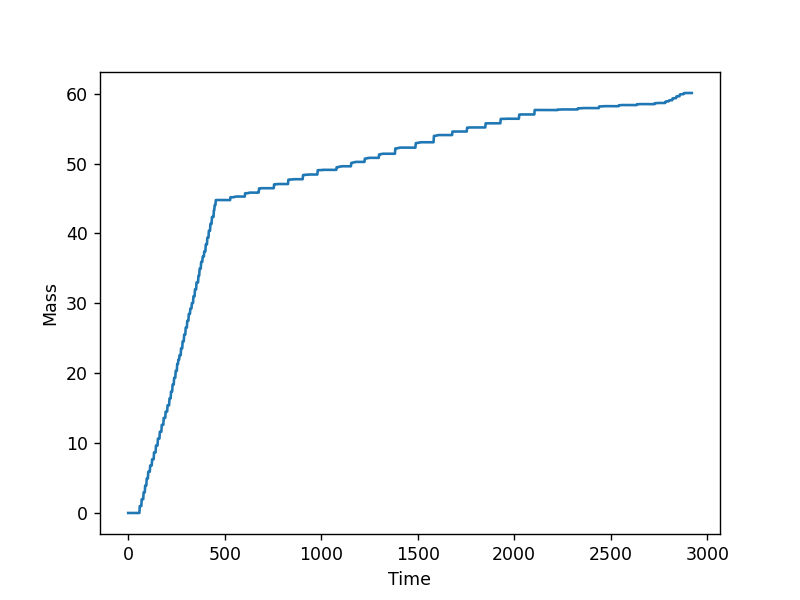

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_080823_S745-750.csv')